In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('Student-University.csv', names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [78]:
X = data.drop('y', axis=1)
y = data['y']

X = (X-X.mean())/X.std()
xtr, xte, ytr, yte = train_test_split(X, y)

model = LogisticRegression()
history = model.fit(xtr, ytr)

y_pred = model.predict(xte)
accuracy = (y_pred == yte).mean()

print(f'Accuracy : {accuracy}')

Accuracy : 0.84


In [114]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Iterations : {model.n_iter_}')

Coefficients: [[2.02246397 1.97925667]]
Intercept: [1.01549615]
Iterations : [9]


In [22]:
def sigmoid(x):
    return (1/(1+(np.exp(-x))))

In [103]:
X = xtr
X['ite'] = 1
y = ytr

theta = [0 for _ in range(X.shape[1])]
alpha = 0.01
n_itr = 7000

for _ in range(n_itr):
    z = X.dot(theta)
    h = sigmoid(z)
    error = h - y
    gradient = ((X.T).dot(error))/len(X['x1'])
    theta -= alpha*gradient

theta

x1     2.674433
x2     2.602150
ite    1.210014
dtype: float64

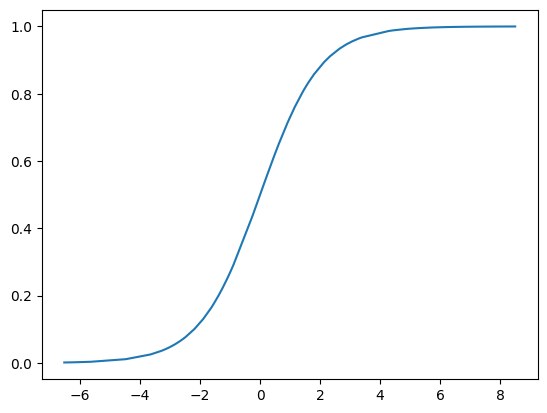

In [113]:
res = pd.DataFrame()

z = np.dot(X, theta)
z.sort()

plt.figure()
plt.plot(z, sigmoid(z))